Random Forest Accuracy Score: 75.00%


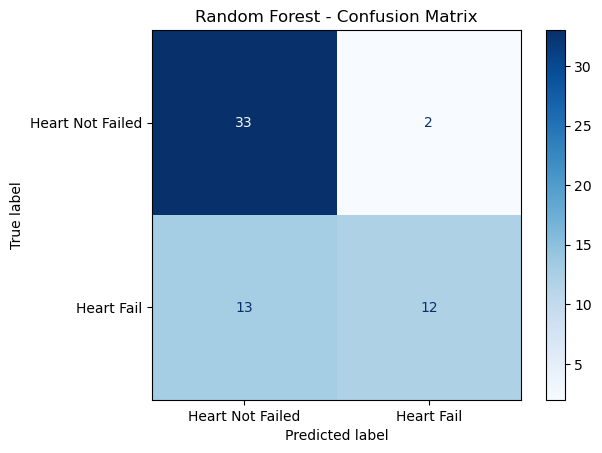

Please enter the following values:


Enter age (in years):  34
Do you have anaemia? (1 for Yes, 0 for No):  0
Enter creatinine phosphokinase level (mcg/L):  300
Do you have diabetes? (1 for Yes, 0 for No):  0
Enter ejection fraction (percentage):  23
Do you have high blood pressure? (1 for Yes, 0 for No):  0
Enter platelet count (kiloplatelets/mL):  200000
Enter serum creatinine level (mg/dL):  03
Enter serum sodium level (mEq/L):  130
Enter your sex (1 for Male, 0 for Female):  1
Do you smoke? (1 for Yes, 0 for No):  1
Enter the follow-up period (in days):  20



Prediction: Heart Fail
Prediction Probabilities: [0.21 0.79]


In [6]:
import warnings
warnings.filterwarnings("ignore")

# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'heart_failure_clinical_records_dataset.csv'
heart_data = pd.read_csv(file_path)

# Selecting important attributes for better prediction
features = [
    'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
    'ejection_fraction', 'high_blood_pressure', 'platelets',
    'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'
]
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training - Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy Score: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Heart Not Failed", "Heart Fail"])
disp.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

# Function for predicting based on new input
def predict_outcome(new_data):
    new_data_df = pd.DataFrame([new_data], columns=features)
    prediction = model.predict(new_data_df)
    prediction_prob = model.predict_proba(new_data_df)
    return prediction[0], prediction_prob[0]

# Simplified function for novice users
def user_friendly_prediction():
    print("Please enter the following values:")
    age = int(input("Enter age (in years): "))
    anaemia = int(input("Do you have anaemia? (1 for Yes, 0 for No): "))
    creatinine_phosphokinase = float(input("Enter creatinine phosphokinase level (mcg/L): "))
    diabetes = int(input("Do you have diabetes? (1 for Yes, 0 for No): "))
    ejection_fraction = float(input("Enter ejection fraction (percentage): "))
    high_blood_pressure = int(input("Do you have high blood pressure? (1 for Yes, 0 for No): "))
    platelets = float(input("Enter platelet count (kiloplatelets/mL): "))
    serum_creatinine = float(input("Enter serum creatinine level (mg/dL): "))
    serum_sodium = float(input("Enter serum sodium level (mEq/L): "))
    sex = int(input("Enter your sex (1 for Male, 0 for Female): "))
    smoking = int(input("Do you smoke? (1 for Yes, 0 for No): "))
    time = int(input("Enter the follow-up period (in days): "))

    # Prepare input
    user_input = {
        'age': age,
        'anaemia': anaemia,
        'creatinine_phosphokinase': creatinine_phosphokinase,
        'diabetes': diabetes,
        'ejection_fraction': ejection_fraction,
        'high_blood_pressure': high_blood_pressure,
        'platelets': platelets,
        'serum_creatinine': serum_creatinine,
        'serum_sodium': serum_sodium,
        'sex': sex,
        'smoking': smoking,
        'time': time
    }

    # Predict outcome
    result, probability = predict_outcome(user_input)
    print(f"\nPrediction: {'Heart Fail' if result == 1 else 'Heart Not Failed'}")
    print(f"Prediction Probabilities: {probability}")

# Uncomment below to enable user interaction
user_friendly_prediction()
